# Imports and Setting Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = (256, 256)
num_classes = 4
learning_rate = 0.001
batch_size = 32
num_epochs = 10

In [ ]:
transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor()
])

In [ ]:
train_dataset = datasets.ImageFolder(root = '/content/drive/My Drive/Madhu Research/Data/train', transform = transform)
val_dataset = datasets.ImageFolder(root = '/content/drive/My Drive/Madhu Research/Data/val', transform = transform)
test_dataset = datasets.ImageFolder(root = '/content/drive/My Drive/Madhu Research/Data/test', transform = transform)

train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(dataset = val_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
def check_accuracy(loader, model, cm = False):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        all_y = []
        all_preds = []
        for x, y in loader:
            x = x.to(device = device)
            y = y.to(device = device)
            scores = model(x)
            _, predictions = scores.max(1)
            all_y.extend(list(y.to('cpu')))
            all_preds.extend(list(predictions.to('cpu')))
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        if cm:
            cm = confusion_matrix(np.array(all_preds), np.array(all_y))
            disp = ConfusionMatrixDisplay(confusion_matrix = cm)
            disp.plot()
            plt.show()

    model.train()
    print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    return (float(num_correct)/float(num_samples))*100

# CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1)
        self.fc = nn.Linear(32*input_size[0]//4*input_size[1]//4, num_classes)

    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
model = CNN(num_classes = num_classes).to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model))

Epoch 1:


90it [12:31,  8.35s/it]


Training Accuracy: 
Got 2210 / 2870 with accuracy 77.00
Validation Accuracy: 
Got 10 / 24 with accuracy 41.67
Epoch 2:


90it [00:18,  4.91it/s]


Training Accuracy: 
Got 2419 / 2870 with accuracy 84.29
Validation Accuracy: 
Got 10 / 24 with accuracy 41.67
Epoch 3:


90it [00:19,  4.62it/s]


Training Accuracy: 
Got 2474 / 2870 with accuracy 86.20
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 4:


90it [00:19,  4.71it/s]


Training Accuracy: 
Got 2800 / 2870 with accuracy 97.56
Validation Accuracy: 
Got 17 / 24 with accuracy 70.83
Epoch 5:


90it [00:18,  4.83it/s]


Training Accuracy: 
Got 2853 / 2870 with accuracy 99.41
Validation Accuracy: 
Got 18 / 24 with accuracy 75.00
Epoch 6:


90it [00:19,  4.73it/s]


Training Accuracy: 
Got 2866 / 2870 with accuracy 99.86
Validation Accuracy: 
Got 17 / 24 with accuracy 70.83
Epoch 7:


90it [00:18,  4.75it/s]


Training Accuracy: 
Got 2866 / 2870 with accuracy 99.86
Validation Accuracy: 
Got 18 / 24 with accuracy 75.00
Epoch 8:


90it [00:18,  4.89it/s]


Training Accuracy: 
Got 2868 / 2870 with accuracy 99.93
Validation Accuracy: 
Got 18 / 24 with accuracy 75.00
Epoch 9:


90it [00:19,  4.73it/s]


Training Accuracy: 
Got 2870 / 2870 with accuracy 100.00
Validation Accuracy: 
Got 18 / 24 with accuracy 75.00
Epoch 10:


90it [00:19,  4.73it/s]


Training Accuracy: 
Got 2870 / 2870 with accuracy 100.00
Validation Accuracy: 
Got 18 / 24 with accuracy 75.00


Testing Accuracy: 


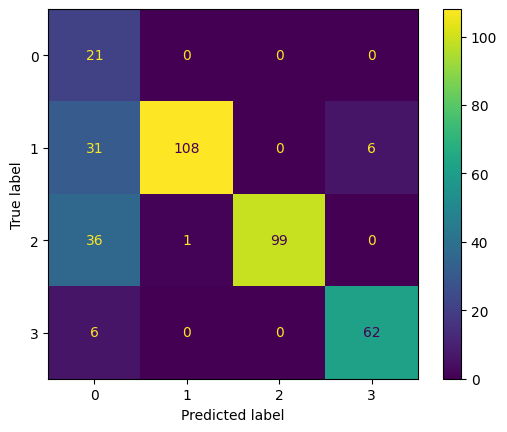

Got 290 / 370 with accuracy 78.38


78.37837837837837

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model, True)

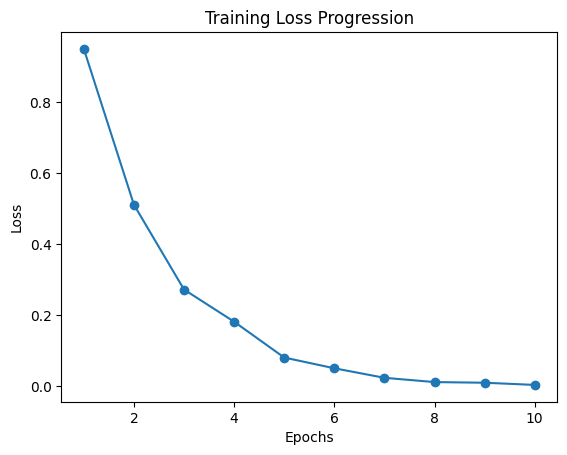

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

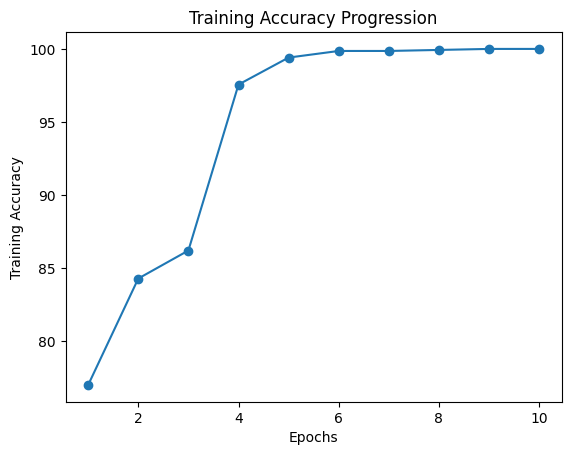

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

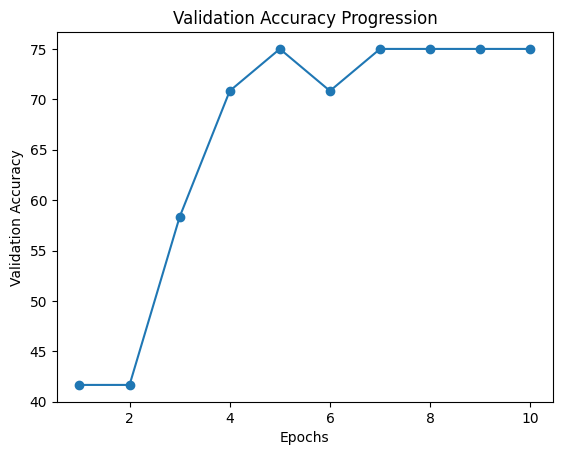

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

# ResNet

## Pretrained ResNet without Fine-Tuning (Training only the final layer)

In [ ]:
model_pretrained = models.resnet50(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 192MB/s]


In [ ]:
for param in model_pretrained.parameters():
    param.requires_grad = False

In [ ]:
num_ftrs = model_pretrained.fc.in_features
model_pretrained.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_pretrained = model_pretrained.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pretrained.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_pretrained(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_pretrained))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_pretrained))

Epoch 1:


90it [28:31, 19.01s/it]


Training Accuracy: 
Got 2257 / 2870 with accuracy 78.64
Validation Accuracy: 
Got 10 / 24 with accuracy 41.67
Epoch 2:


90it [00:29,  3.10it/s]


Training Accuracy: 
Got 2302 / 2870 with accuracy 80.21
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 3:


90it [00:27,  3.23it/s]


Training Accuracy: 
Got 2423 / 2870 with accuracy 84.43
Validation Accuracy: 
Got 8 / 24 with accuracy 33.33
Epoch 4:


90it [00:27,  3.24it/s]


Training Accuracy: 
Got 2438 / 2870 with accuracy 84.95
Validation Accuracy: 
Got 5 / 24 with accuracy 20.83
Epoch 5:


90it [00:28,  3.18it/s]


Training Accuracy: 
Got 2477 / 2870 with accuracy 86.31
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 6:


90it [00:28,  3.21it/s]


Training Accuracy: 
Got 2442 / 2870 with accuracy 85.09
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 7:


90it [00:28,  3.18it/s]


Training Accuracy: 
Got 2520 / 2870 with accuracy 87.80
Validation Accuracy: 
Got 11 / 24 with accuracy 45.83
Epoch 8:


90it [00:28,  3.21it/s]


Training Accuracy: 
Got 2539 / 2870 with accuracy 88.47
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 9:


90it [00:28,  3.11it/s]


Training Accuracy: 
Got 2552 / 2870 with accuracy 88.92
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 10:


90it [00:27,  3.24it/s]


Training Accuracy: 
Got 2554 / 2870 with accuracy 88.99
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17


Testing Accuracy: 


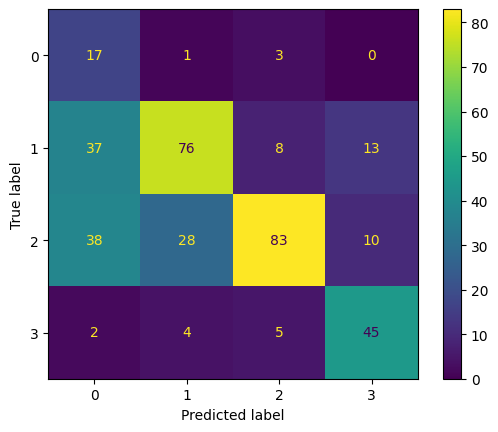

Got 221 / 370 with accuracy 59.73


59.72972972972973

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_pretrained, True)

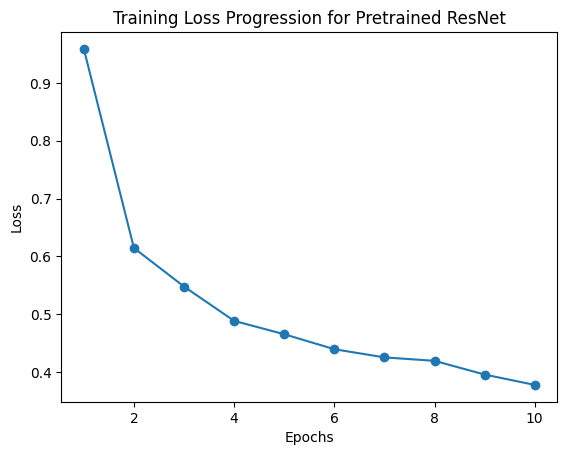

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

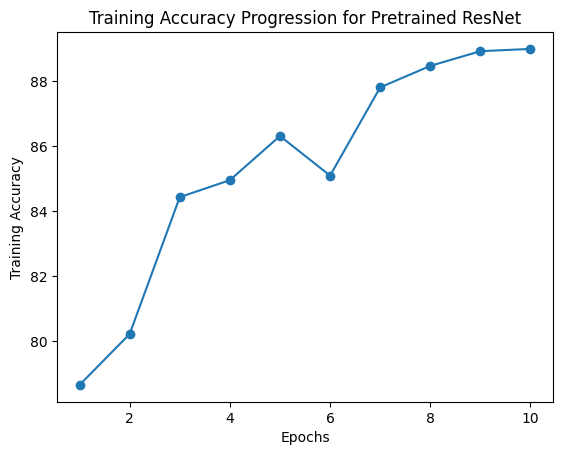

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

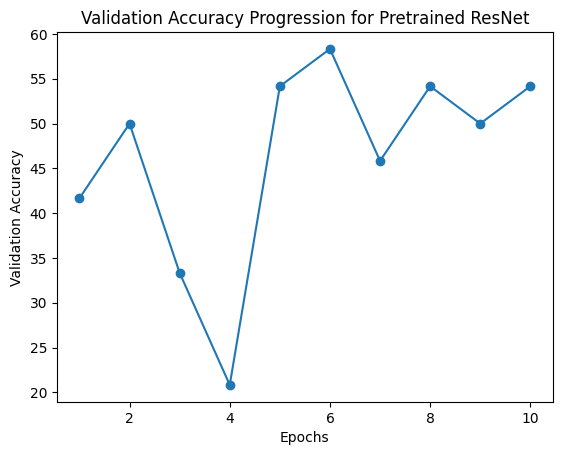

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## Pretrained ResNet with Fine-Tuning (Retraining pretrained model)

In [ ]:
model_pretrained_ft = models.resnet50(pretrained = True)

In [ ]:
num_ftrs = model_pretrained_ft.fc.in_features
model_pretrained_ft.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_pretrained_ft = model_pretrained_ft.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pretrained_ft.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_pretrained_ft(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_pretrained_ft))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_pretrained_ft))

Epoch 1:


90it [00:34,  2.64it/s]


Training Accuracy: 
Got 2292 / 2870 with accuracy 79.86
Validation Accuracy: 
Got 9 / 24 with accuracy 37.50
Epoch 2:


90it [00:34,  2.64it/s]


Training Accuracy: 
Got 2386 / 2870 with accuracy 83.14
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 3:


90it [00:34,  2.61it/s]


Training Accuracy: 
Got 2432 / 2870 with accuracy 84.74
Validation Accuracy: 
Got 8 / 24 with accuracy 33.33
Epoch 4:


90it [00:34,  2.60it/s]


Training Accuracy: 
Got 2464 / 2870 with accuracy 85.85
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 5:


90it [00:34,  2.60it/s]


Training Accuracy: 
Got 2497 / 2870 with accuracy 87.00
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 6:


90it [00:34,  2.60it/s]


Training Accuracy: 
Got 2498 / 2870 with accuracy 87.04
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 7:


90it [00:34,  2.59it/s]


Training Accuracy: 
Got 2526 / 2870 with accuracy 88.01
Validation Accuracy: 
Got 10 / 24 with accuracy 41.67
Epoch 8:


90it [00:34,  2.60it/s]


Training Accuracy: 
Got 2537 / 2870 with accuracy 88.40
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 9:


90it [00:34,  2.60it/s]


Training Accuracy: 
Got 2543 / 2870 with accuracy 88.61
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 10:


90it [00:34,  2.60it/s]


Training Accuracy: 
Got 2562 / 2870 with accuracy 89.27
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33


Testing Accuracy: 


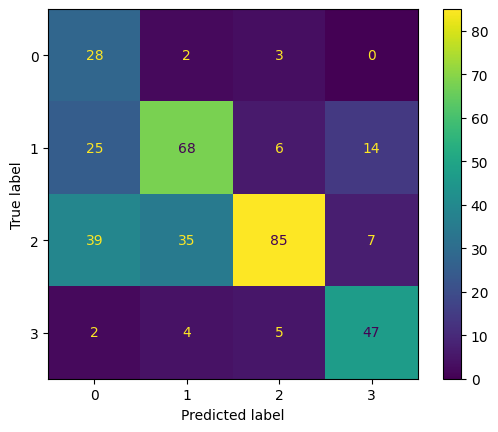

Got 228 / 370 with accuracy 61.62


61.62162162162163

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_pretrained_ft, True)

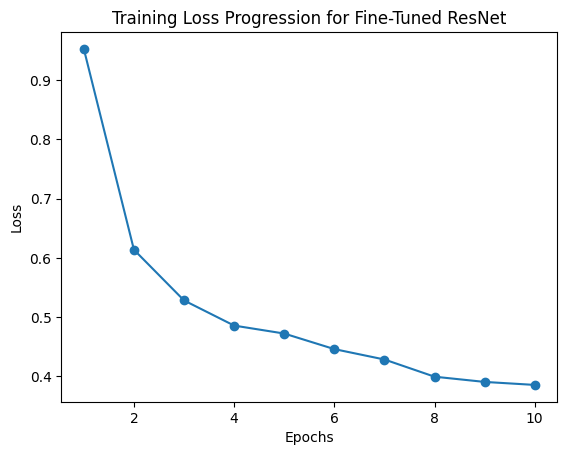

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

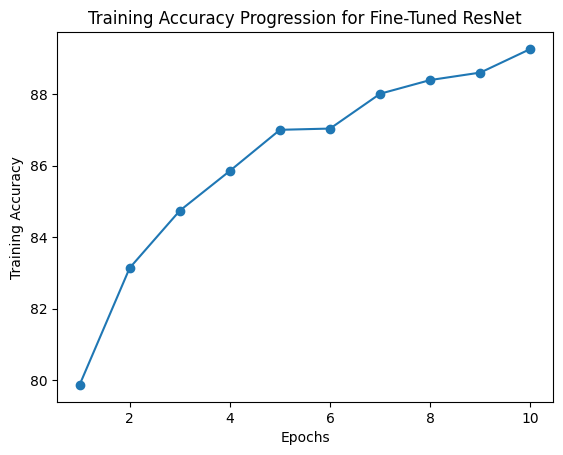

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

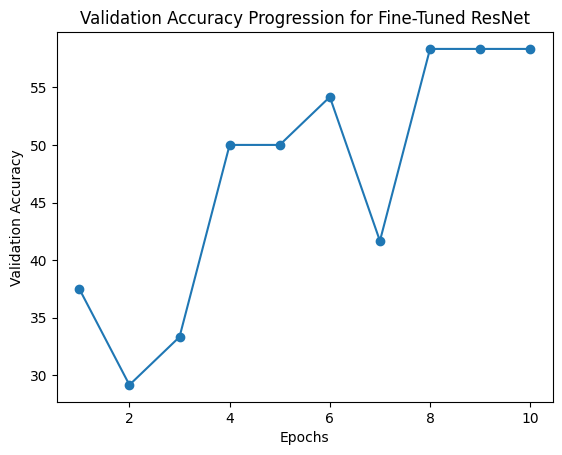

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## ResNet from Scratch (Not Pretrained)

In [ ]:
model_scratch = models.resnet50(pretrained = False)

In [ ]:
num_ftrs = model_scratch.fc.in_features
model_scratch.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_scratch = model_scratch.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_scratch.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_scratch(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_scratch))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_scratch))

Epoch 1:


90it [00:35,  2.54it/s]


Training Accuracy: 
Got 989 / 2870 with accuracy 34.46
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 2:


90it [00:34,  2.58it/s]


Training Accuracy: 
Got 1643 / 2870 with accuracy 57.25
Validation Accuracy: 
Got 5 / 24 with accuracy 20.83
Epoch 3:


90it [00:34,  2.58it/s]


Training Accuracy: 
Got 1621 / 2870 with accuracy 56.48
Validation Accuracy: 
Got 5 / 24 with accuracy 20.83
Epoch 4:


90it [00:34,  2.58it/s]


Training Accuracy: 
Got 1524 / 2870 with accuracy 53.10
Validation Accuracy: 
Got 11 / 24 with accuracy 45.83
Epoch 5:


90it [00:35,  2.57it/s]


Training Accuracy: 
Got 1199 / 2870 with accuracy 41.78
Validation Accuracy: 
Got 4 / 24 with accuracy 16.67
Epoch 6:


90it [00:34,  2.58it/s]


Training Accuracy: 
Got 1562 / 2870 with accuracy 54.43
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 7:


90it [00:35,  2.57it/s]


Training Accuracy: 
Got 1506 / 2870 with accuracy 52.47
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 8:


90it [00:34,  2.58it/s]


Training Accuracy: 
Got 1574 / 2870 with accuracy 54.84
Validation Accuracy: 
Got 8 / 24 with accuracy 33.33
Epoch 9:


90it [00:34,  2.57it/s]


Training Accuracy: 
Got 1504 / 2870 with accuracy 52.40
Validation Accuracy: 
Got 4 / 24 with accuracy 16.67
Epoch 10:


90it [00:35,  2.57it/s]


Training Accuracy: 
Got 1658 / 2870 with accuracy 57.77
Validation Accuracy: 
Got 5 / 24 with accuracy 20.83


Testing Accuracy: 


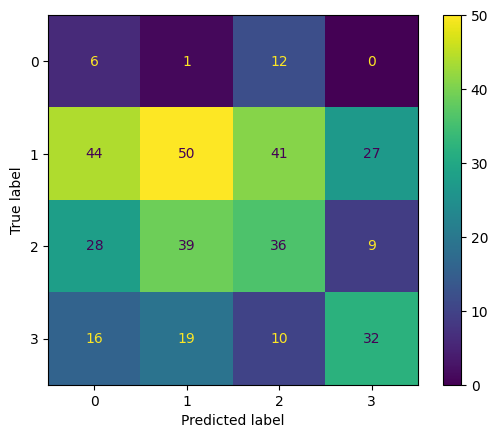

Got 124 / 370 with accuracy 33.51


33.513513513513516

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_scratch, True)

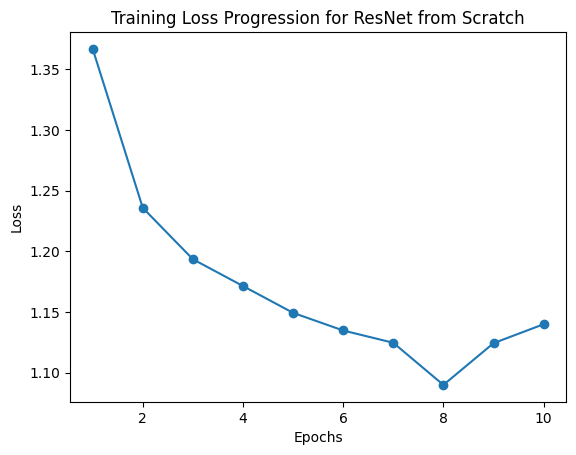

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

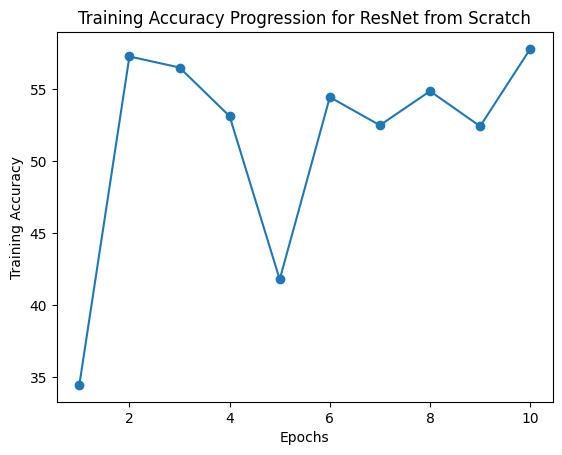

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

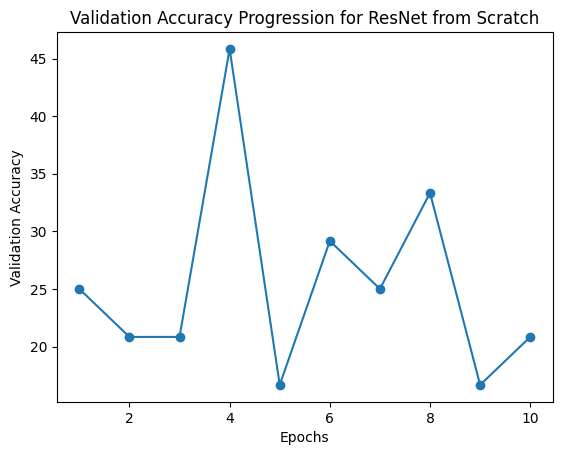

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

# AlexNet

## Pretrained AlexNet without Fine-Tuning (Training only the final layer)

In [ ]:
model_pretrained = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 288MB/s]


In [ ]:
for param in model_pretrained.parameters():
    param.requires_grad = False

In [ ]:
model_pretrained.classifier[6] = nn.Linear(4096, num_classes)

In [ ]:
model_pretrained = model_pretrained.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pretrained.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_pretrained(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_pretrained))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_pretrained))

Epoch 1:


90it [11:53,  7.93s/it]


Training Accuracy: 
Got 2274 / 2870 with accuracy 79.23
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 2:


90it [00:18,  4.81it/s]


Training Accuracy: 
Got 2130 / 2870 with accuracy 74.22
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 3:


90it [00:19,  4.71it/s]


Training Accuracy: 
Got 2340 / 2870 with accuracy 81.53
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 4:


90it [00:18,  4.87it/s]


Training Accuracy: 
Got 2298 / 2870 with accuracy 80.07
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 5:


90it [00:18,  4.84it/s]


Training Accuracy: 
Got 2076 / 2870 with accuracy 72.33
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 6:


90it [00:19,  4.69it/s]


Training Accuracy: 
Got 2151 / 2870 with accuracy 74.95
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 7:


90it [00:18,  4.84it/s]


Training Accuracy: 
Got 2406 / 2870 with accuracy 83.83
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 8:


90it [00:18,  4.84it/s]


Training Accuracy: 
Got 2181 / 2870 with accuracy 75.99
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 9:


90it [00:19,  4.58it/s]


Training Accuracy: 
Got 2319 / 2870 with accuracy 80.80
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 10:


90it [00:18,  4.87it/s]


Training Accuracy: 
Got 2202 / 2870 with accuracy 76.72
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00


Testing Accuracy: 


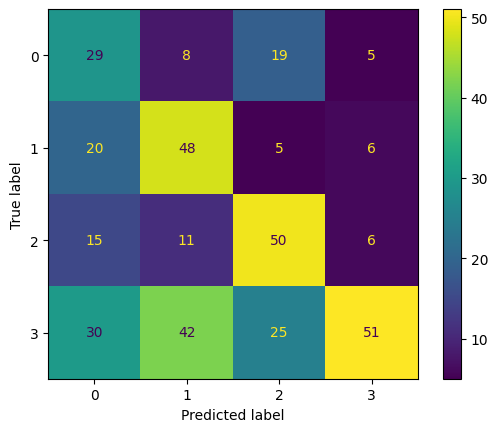

Got 178 / 370 with accuracy 48.11


48.10810810810811

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_pretrained, True)

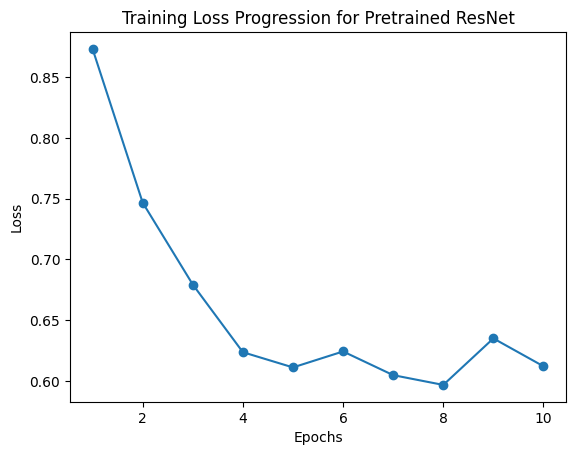

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

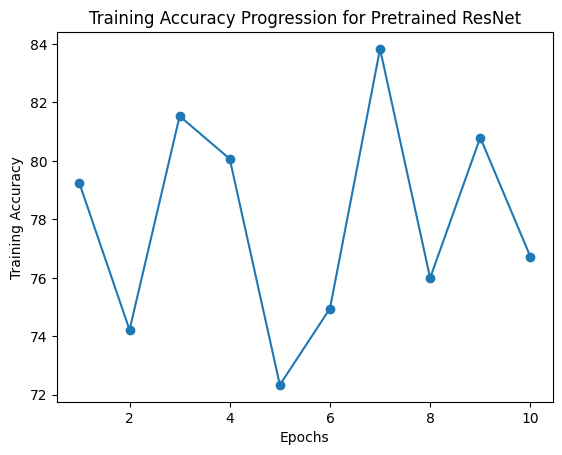

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

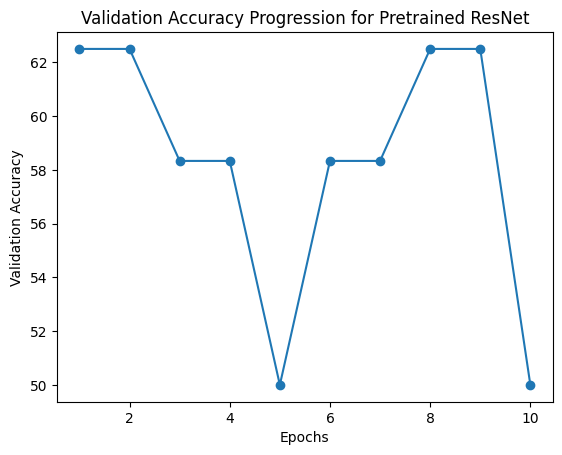

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## Pretrained AlexNet with Fine-Tuning (Retraining pretrained model)

In [ ]:
model_pretrained_ft = models.alexnet(pretrained = True)

In [ ]:
model_pretrained_ft.classifier[6] = nn.Linear(4096, num_classes)

In [ ]:
model_pretrained_ft = model_pretrained_ft.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pretrained_ft.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_pretrained_ft(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_pretrained_ft))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_pretrained_ft))

Epoch 1:


90it [00:24,  3.72it/s]


Training Accuracy: 
Got 2412 / 2870 with accuracy 84.04
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 2:


90it [00:19,  4.54it/s]


Training Accuracy: 
Got 2536 / 2870 with accuracy 88.36
Validation Accuracy: 
Got 16 / 24 with accuracy 66.67
Epoch 3:


90it [00:19,  4.71it/s]


Training Accuracy: 
Got 2648 / 2870 with accuracy 92.26
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 4:


90it [00:18,  4.83it/s]


Training Accuracy: 
Got 2609 / 2870 with accuracy 90.91
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 5:


90it [00:19,  4.73it/s]


Training Accuracy: 
Got 2734 / 2870 with accuracy 95.26
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 6:


90it [00:19,  4.62it/s]


Training Accuracy: 
Got 2671 / 2870 with accuracy 93.07
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 7:


90it [00:18,  4.82it/s]


Training Accuracy: 
Got 2767 / 2870 with accuracy 96.41
Validation Accuracy: 
Got 16 / 24 with accuracy 66.67
Epoch 8:


90it [00:18,  4.81it/s]


Training Accuracy: 
Got 2797 / 2870 with accuracy 97.46
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 9:


90it [00:19,  4.61it/s]


Training Accuracy: 
Got 2779 / 2870 with accuracy 96.83
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 10:


90it [00:19,  4.65it/s]


Training Accuracy: 
Got 2842 / 2870 with accuracy 99.02
Validation Accuracy: 
Got 16 / 24 with accuracy 66.67


Testing Accuracy: 


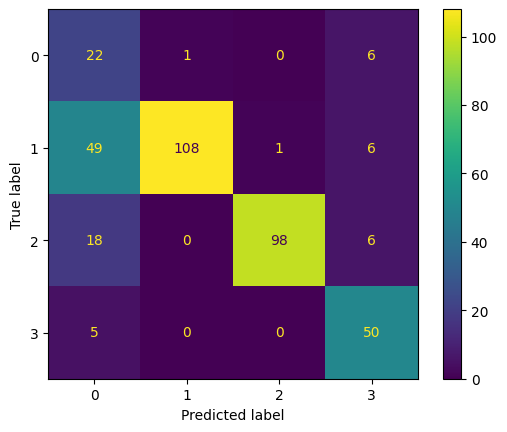

Got 278 / 370 with accuracy 75.14


75.13513513513513

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_pretrained_ft, True)

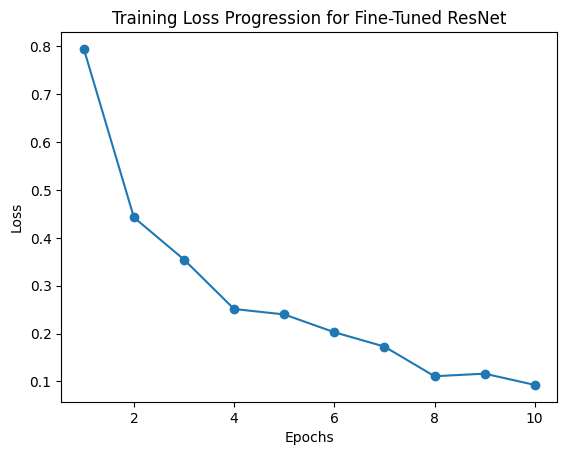

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

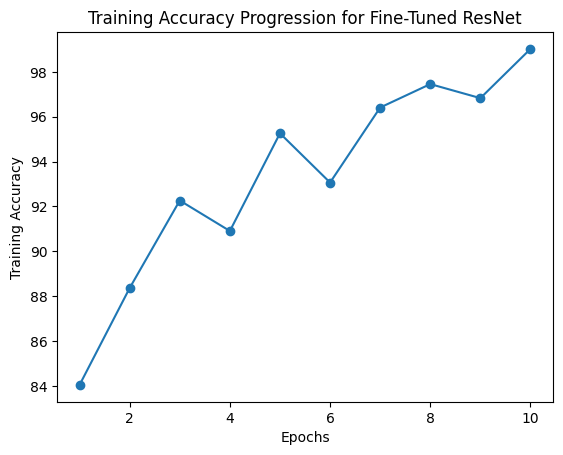

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

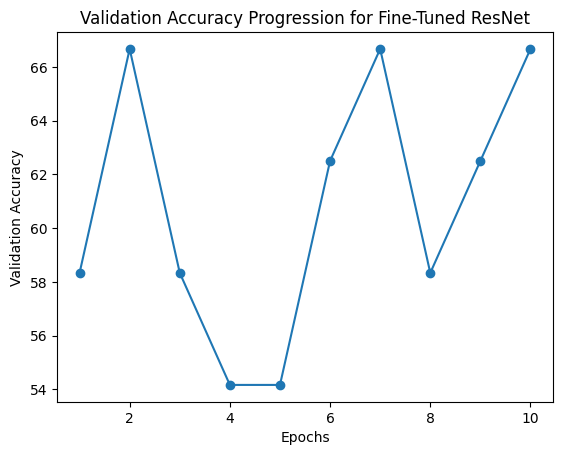

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## AlexNet from Scratch (Not Pretrained)

In [ ]:
model_scratch = models.alexnet(pretrained = False)

In [ ]:
model_scratch.classifier[6] = nn.Linear(4096, num_classes)

In [ ]:
model_scratch = model_scratch.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_scratch(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_scratch))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_scratch))

Epoch 1:


90it [00:19,  4.70it/s]


Training Accuracy: 
Got 822 / 2870 with accuracy 28.64
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 2:


90it [00:18,  4.85it/s]


Training Accuracy: 
Got 830 / 2870 with accuracy 28.92
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 3:


90it [00:18,  4.74it/s]


Training Accuracy: 
Got 905 / 2870 with accuracy 31.53
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 4:


90it [00:19,  4.61it/s]


Training Accuracy: 
Got 921 / 2870 with accuracy 32.09
Validation Accuracy: 
Got 5 / 24 with accuracy 20.83
Epoch 5:


90it [00:18,  4.86it/s]


Training Accuracy: 
Got 822 / 2870 with accuracy 28.64
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 6:


90it [00:18,  4.87it/s]


Training Accuracy: 
Got 834 / 2870 with accuracy 29.06
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 7:


90it [00:19,  4.66it/s]


Training Accuracy: 
Got 1120 / 2870 with accuracy 39.02
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 8:


90it [00:18,  4.76it/s]


Training Accuracy: 
Got 843 / 2870 with accuracy 29.37
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00
Epoch 9:


90it [00:18,  4.86it/s]


Training Accuracy: 
Got 1267 / 2870 with accuracy 44.15
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 10:


90it [00:18,  4.79it/s]


Training Accuracy: 
Got 1268 / 2870 with accuracy 44.18
Validation Accuracy: 
Got 6 / 24 with accuracy 25.00


Testing Accuracy: 


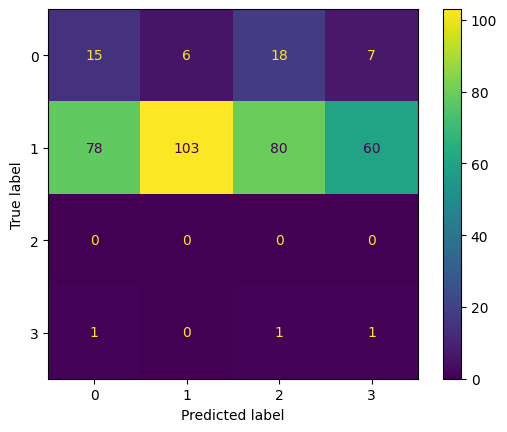

Got 119 / 370 with accuracy 32.16


32.16216216216216

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_scratch, True)

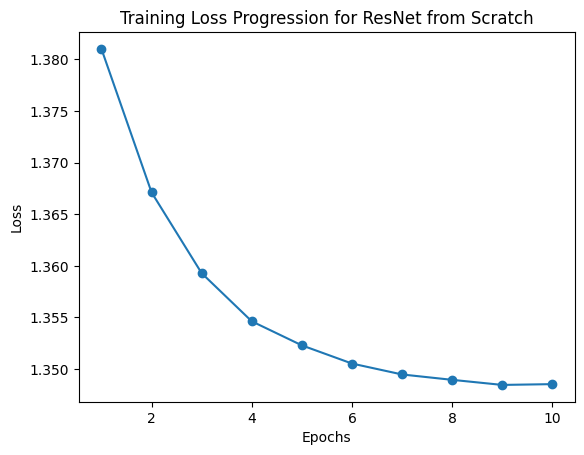

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

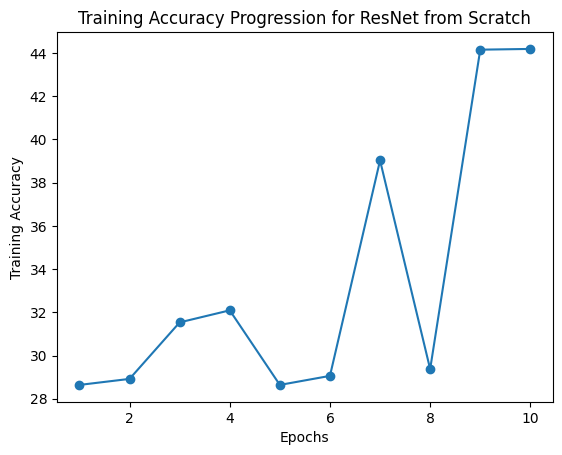

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

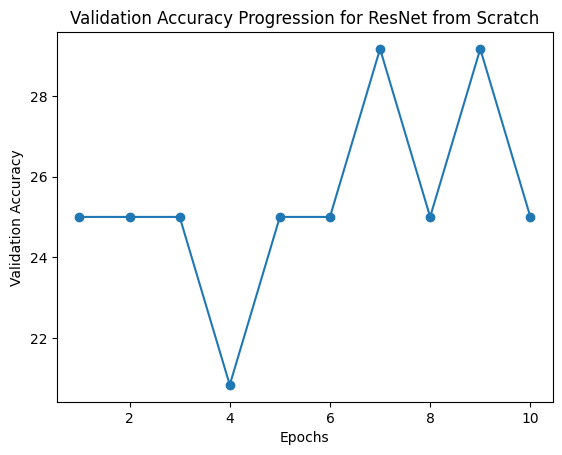

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

# GoogleNet

## Pretrained GoogLeNet without Fine-Tuning (Training only the final layer)

In [ ]:
model_pretrained = models.googlenet(pretrained = True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 210MB/s]


In [ ]:
for param in model_pretrained.parameters():
    param.requires_grad = False

In [ ]:
num_ftrs = model_pretrained.fc.in_features
model_pretrained.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_pretrained = model_pretrained.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pretrained.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_pretrained(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_pretrained))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_pretrained))

Epoch 1:


90it [08:05,  5.39s/it]


Training Accuracy: 
Got 2125 / 2870 with accuracy 74.04
Validation Accuracy: 
Got 11 / 24 with accuracy 45.83
Epoch 2:


90it [00:22,  3.92it/s]


Training Accuracy: 
Got 2254 / 2870 with accuracy 78.54
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 3:


90it [00:23,  3.79it/s]


Training Accuracy: 
Got 2278 / 2870 with accuracy 79.37
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 4:


90it [00:23,  3.84it/s]


Training Accuracy: 
Got 2316 / 2870 with accuracy 80.70
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 5:


90it [00:22,  3.92it/s]


Training Accuracy: 
Got 2390 / 2870 with accuracy 83.28
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 6:


90it [00:23,  3.83it/s]


Training Accuracy: 
Got 2398 / 2870 with accuracy 83.55
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 7:


90it [00:23,  3.85it/s]


Training Accuracy: 
Got 2404 / 2870 with accuracy 83.76
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 8:


90it [00:30,  2.91it/s]


Training Accuracy: 
Got 2428 / 2870 with accuracy 84.60
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 9:


90it [00:23,  3.90it/s]


Training Accuracy: 
Got 2435 / 2870 with accuracy 84.84
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17
Epoch 10:


90it [00:23,  3.79it/s]


Training Accuracy: 
Got 2458 / 2870 with accuracy 85.64
Validation Accuracy: 
Got 13 / 24 with accuracy 54.17


Testing Accuracy: 


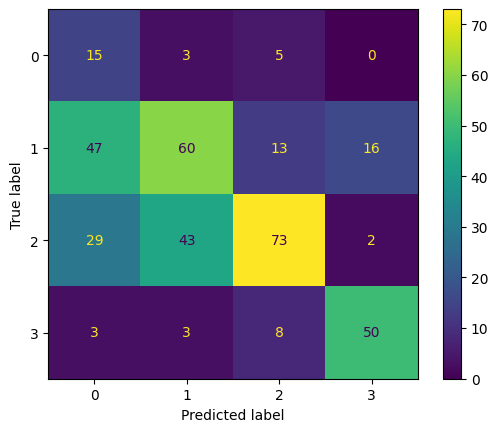

Got 198 / 370 with accuracy 53.51


53.51351351351351

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_pretrained, True)

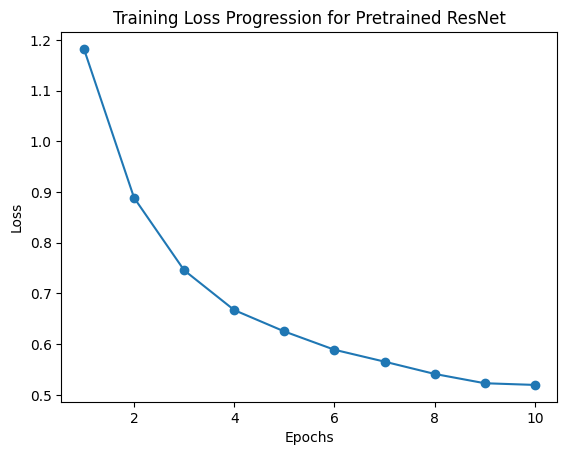

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

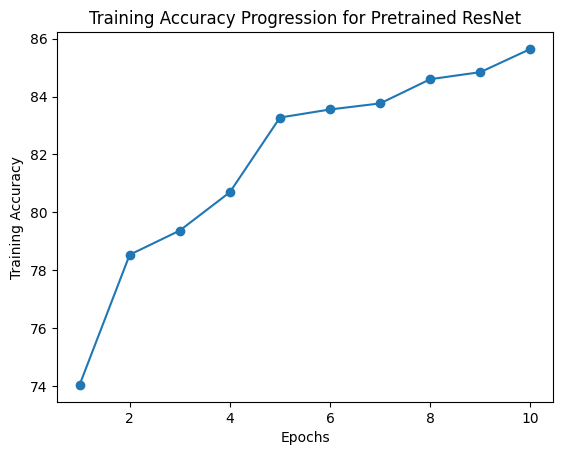

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

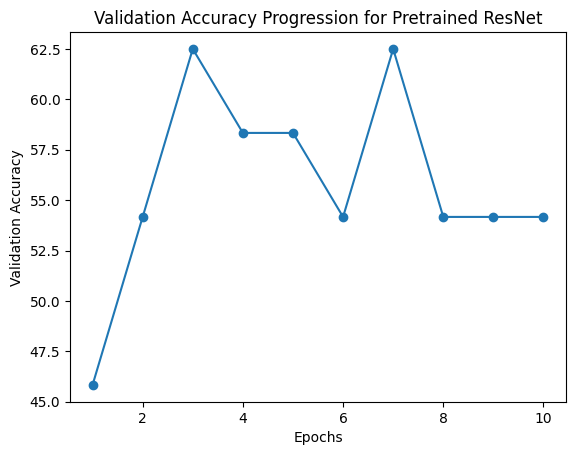

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for Pretrained ResNet")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## Pretrained GoogLeNet with Fine-Tuning (Retraining pretrained model)

In [ ]:
model_pretrained_ft = models.googlenet(pretrained = True)

In [ ]:
num_ftrs = model_pretrained_ft.fc.in_features
model_pretrained_ft.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_pretrained_ft = model_pretrained_ft.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pretrained_ft.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores = model_pretrained_ft(data)
        loss = criterion(scores, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_pretrained_ft))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_pretrained_ft))

Epoch 1:


90it [00:22,  3.93it/s]


Training Accuracy: 
Got 2026 / 2870 with accuracy 70.59
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 2:


90it [00:23,  3.83it/s]


Training Accuracy: 
Got 2280 / 2870 with accuracy 79.44
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 3:


90it [00:22,  3.98it/s]


Training Accuracy: 
Got 2270 / 2870 with accuracy 79.09
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 4:


90it [00:21,  4.13it/s]


Training Accuracy: 
Got 2333 / 2870 with accuracy 81.29
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 5:


90it [00:21,  4.13it/s]


Training Accuracy: 
Got 2344 / 2870 with accuracy 81.67
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 6:


90it [00:22,  3.97it/s]


Training Accuracy: 
Got 2414 / 2870 with accuracy 84.11
Validation Accuracy: 
Got 12 / 24 with accuracy 50.00
Epoch 7:


90it [00:22,  4.01it/s]


Training Accuracy: 
Got 2383 / 2870 with accuracy 83.03
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 8:


90it [00:22,  4.08it/s]


Training Accuracy: 
Got 2440 / 2870 with accuracy 85.02
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33
Epoch 9:


90it [00:21,  4.16it/s]


Training Accuracy: 
Got 2427 / 2870 with accuracy 84.56
Validation Accuracy: 
Got 15 / 24 with accuracy 62.50
Epoch 10:


90it [00:22,  4.03it/s]


Training Accuracy: 
Got 2452 / 2870 with accuracy 85.44
Validation Accuracy: 
Got 14 / 24 with accuracy 58.33


Testing Accuracy: 


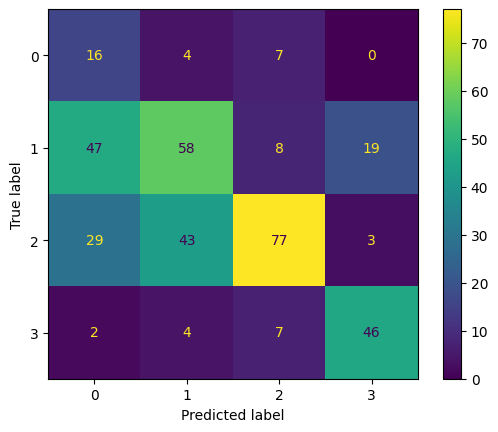

Got 197 / 370 with accuracy 53.24


53.24324324324324

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_pretrained_ft, True)

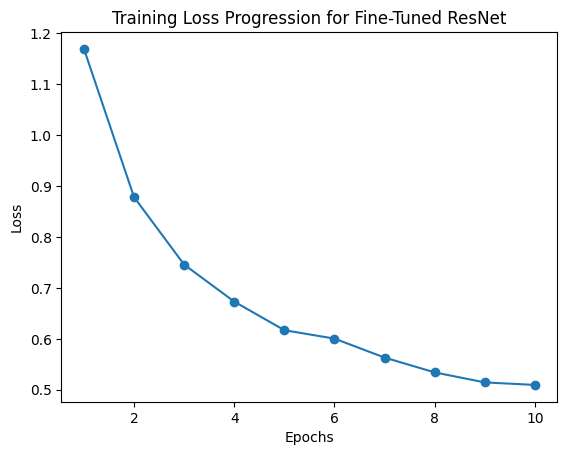

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

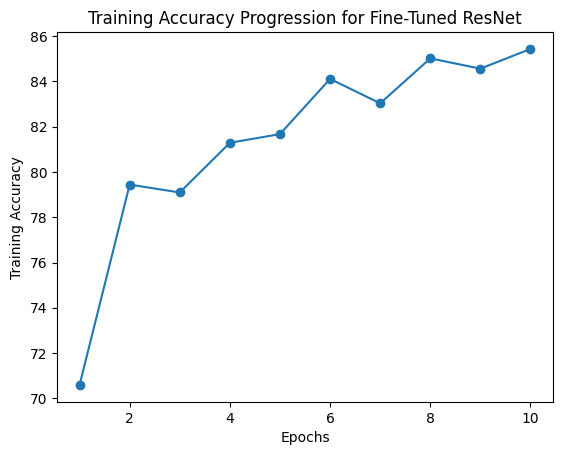

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

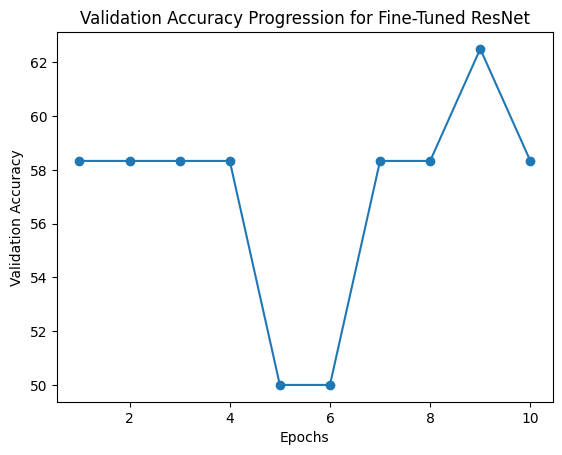

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for Fine-Tuned ResNet")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## GoogLeNet from Scratch (Not Pretrained)

In [ ]:
model_scratch = models.googlenet(pretrained = False)

In [ ]:
num_ftrs = model_scratch.fc.in_features
model_scratch.fc = nn.Linear(num_ftrs, num_classes)

In [ ]:
model_scratch = model_scratch.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_scratch.fc.parameters(), lr=0.001, momentum=0.9)

In [ ]:
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
train_acc = []
val_acc = []
loss_l = []

In [ ]:
for epoch in range(num_epochs):
    tot_loss = 0
    count = 0
    print("Epoch " + str(epoch + 1) + ":")
    for batch_idx, (data, targets) in tqdm.tqdm(enumerate(train_loader)):
        data = data.to(device = device)
        targets = targets.to(device = device)

        scores= model_scratch(data)
        loss = criterion(scores.logits, targets)
        tot_loss += loss.to('cpu').detach().numpy()
        count+=1

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    loss_l.append(tot_loss/count)

    print("Training Accuracy: ")
    train_acc.append(check_accuracy(train_loader, model_scratch))

    print("Validation Accuracy: ")
    val_acc.append(check_accuracy(val_loader, model_scratch))

Epoch 1:


90it [00:23,  3.79it/s]


Training Accuracy: 
Got 1235 / 2870 with accuracy 43.03
Validation Accuracy: 
Got 8 / 24 with accuracy 33.33
Epoch 2:


90it [00:23,  3.90it/s]


Training Accuracy: 
Got 1552 / 2870 with accuracy 54.08
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 3:


90it [00:22,  4.05it/s]


Training Accuracy: 
Got 1537 / 2870 with accuracy 53.55
Validation Accuracy: 
Got 8 / 24 with accuracy 33.33
Epoch 4:


90it [00:23,  3.87it/s]


Training Accuracy: 
Got 1609 / 2870 with accuracy 56.06
Validation Accuracy: 
Got 10 / 24 with accuracy 41.67
Epoch 5:


90it [00:22,  3.93it/s]


Training Accuracy: 
Got 1718 / 2870 with accuracy 59.86
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 6:


90it [00:22,  3.99it/s]


Training Accuracy: 
Got 1800 / 2870 with accuracy 62.72
Validation Accuracy: 
Got 5 / 24 with accuracy 20.83
Epoch 7:


90it [00:22,  4.05it/s]


Training Accuracy: 
Got 1810 / 2870 with accuracy 63.07
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 8:


90it [00:22,  3.93it/s]


Training Accuracy: 
Got 1858 / 2870 with accuracy 64.74
Validation Accuracy: 
Got 7 / 24 with accuracy 29.17
Epoch 9:


90it [00:23,  3.91it/s]


Training Accuracy: 
Got 1849 / 2870 with accuracy 64.43
Validation Accuracy: 
Got 9 / 24 with accuracy 37.50
Epoch 10:


90it [00:22,  4.03it/s]


Training Accuracy: 
Got 1856 / 2870 with accuracy 64.67
Validation Accuracy: 
Got 8 / 24 with accuracy 33.33


Testing Accuracy: 


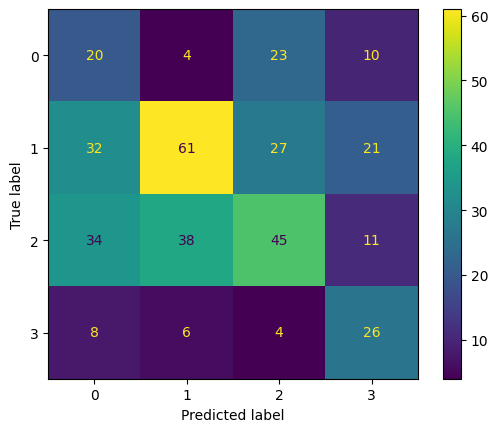

Got 152 / 370 with accuracy 41.08


41.08108108108108

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model_scratch, True)

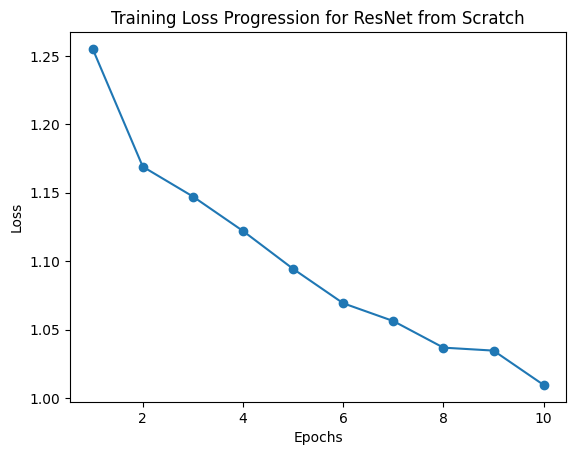

In [ ]:
plt.plot(range(1, num_epochs + 1), loss_l, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

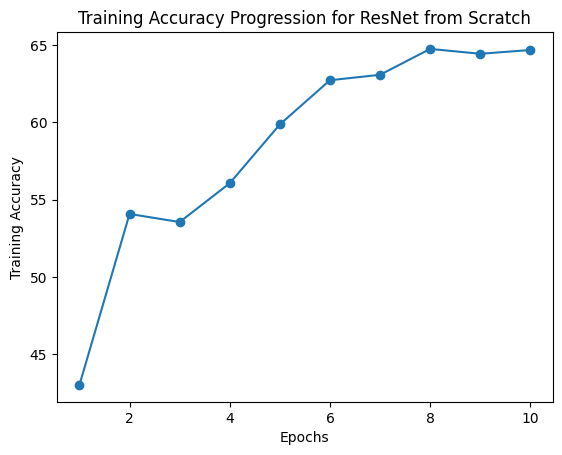

In [ ]:
plt.plot(range(1, num_epochs + 1), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

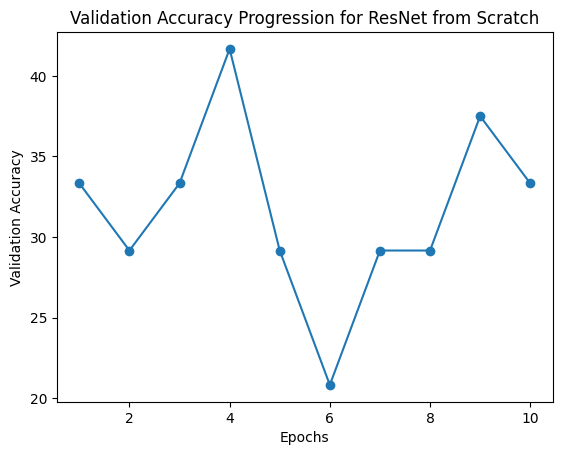

In [ ]:
plt.plot(range(1, num_epochs + 1), val_acc, marker= 'o', linestyle = '-')
plt.title("Validation Accuracy Progression for ResNet from Scratch")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

# ViT

In [ ]:
!pip install torchinfo

In [ ]:
import os
import requests
import zipfile
from pathlib import Path
from typing import List
import torchvision
from torchinfo import summary
from going_modular import engine

In [ ]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def print_train_time(start, end, device=None):
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time


def plot_train_loss(results):
    loss = results["train_loss"]
    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, marker = 'o', linestyle = '-')
    plt.title("Training Loss Progression")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

def plot_train_accuracy(results):
    accuracy = results["train_acc"]
    epochs = range(1, len(accuracy)+1)

    plt.plot(epochs, accuracy, marker = 'o', linestyle = '-')
    plt.title("Training Accuracy Progression")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

def plot_val_accuracy(results):
    val_accuracy = results["test_acc"]
    epochs = range(1, len(val_accuracy)+1)

    plt.plot(epochs, val_accuracy, marker = 'o', linestyle = '-')
    plt.title("Validation Accuracy Progression")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


def pred_and_plot_image(model: torch.nn.Module, image_path: str, class_names: List[str] = None, transform=None,device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",):

    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image = target_image / 255.0

    if transform:
        target_image = transform(target_image)

    model.to(device)

    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(dim=0)

        target_image_pred = model(target_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.imshow(target_image.squeeze().permute(1, 2, 0))
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

def set_seeds(seed: int=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [ ]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:04<00:00, 79.8MB/s]


In [ ]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [ ]:
train_dir = '/content/drive/MyDrive/Madhu Research/Data/train'
val_dir = '/content/drive/MyDrive/Madhu Research/Data/val'
test_dir = '/content/drive/MyDrive/Madhu Research/Data/test'

In [ ]:
def create_dataloaders(train_dir, val_dir, test_dir, transform, batch_size):
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  val_data = datasets.ImageFolder(val_dir, transform=transform)
  test_data =  datasets.ImageFolder(test_dir, transform=transform)

  class_names = train_data.classes

  train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
  val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
  test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

  return train_dataloader, val_dataloader, test_dataloader, class_names

In [ ]:
train_dataloader_pretrained, val_dataloader_pretrained, test_dataloader_pretrained, class_names = create_dataloaders(train_dir = train_dir, val_dir = val_dir, test_dir = test_dir, transform = pretrained_vit_transforms, batch_size = 8)

In [ ]:
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(), lr = 1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
pretrained_vit_results = engine.train(model = pretrained_vit, train_dataloader = train_dataloader_pretrained, test_dataloader = val_dataloader_pretrained, optimizer = optimizer, loss_fn = loss_fn, epochs = 15, device = device)

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5492 | train_acc: 0.8018 | test_loss: 1.3599 | test_acc: 0.4583
Epoch: 2 | train_loss: 0.3158 | train_acc: 0.8903 | test_loss: 1.3033 | test_acc: 0.5000
Epoch: 3 | train_loss: 0.2535 | train_acc: 0.9107 | test_loss: 1.4192 | test_acc: 0.5417
Epoch: 4 | train_loss: 0.2173 | train_acc: 0.9244 | test_loss: 1.3783 | test_acc: 0.4583
Epoch: 5 | train_loss: 0.1902 | train_acc: 0.9349 | test_loss: 1.2427 | test_acc: 0.5833
Epoch: 6 | train_loss: 0.1737 | train_acc: 0.9422 | test_loss: 1.2814 | test_acc: 0.5833
Epoch: 7 | train_loss: 0.1531 | train_acc: 0.9492 | test_loss: 1.4406 | test_acc: 0.5417
Epoch: 8 | train_loss: 0.1451 | train_acc: 0.9501 | test_loss: 1.2499 | test_acc: 0.6250
Epoch: 9 | train_loss: 0.1337 | train_acc: 0.9583 | test_loss: 1.3526 | test_acc: 0.6250
Epoch: 10 | train_loss: 0.1208 | train_acc: 0.9640 | test_loss: 1.3883 | test_acc: 0.6250
Epoch: 11 | train_loss: 0.1131 | train_acc: 0.9655 | test_loss: 1.3827 | test_acc: 0.6667
Epoch: 12 | train_l

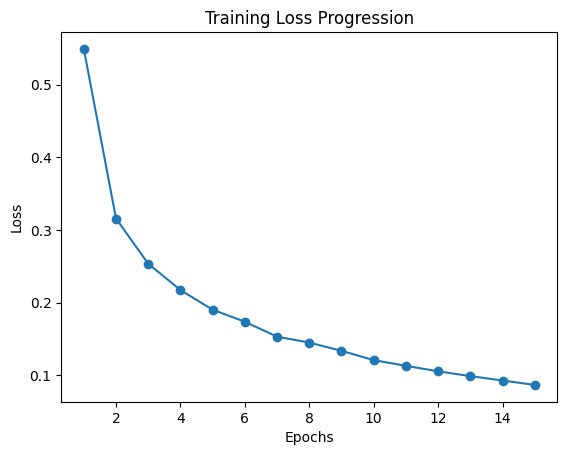

In [ ]:
plot_train_loss(pretrained_vit_results)

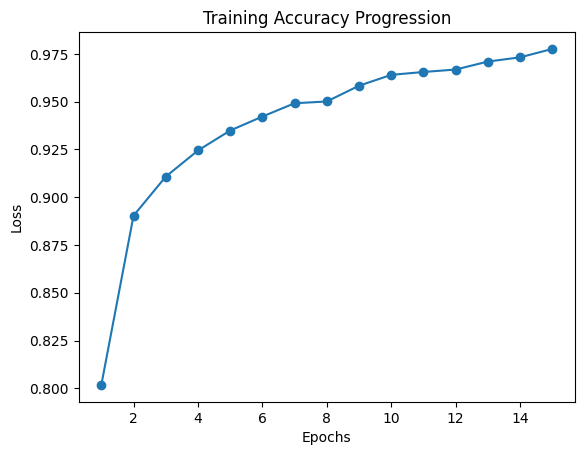

In [ ]:
plot_train_accuracy(pretrained_vit_results)

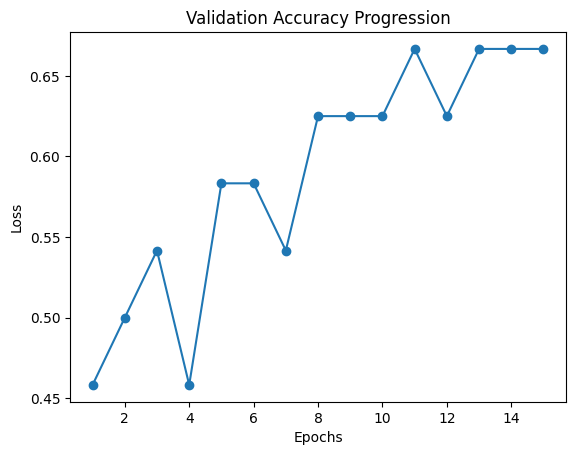

In [ ]:
plot_val_accuracy(pretrained_vit_results)

In [ ]:
def confusion_matrx_ViT(model, dataloader):
  all_preds, all_y = [], []
  model.eval()

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)
      test_pred_labels = test_pred_logits.argmax(dim = 1)
      all_y.extend(list(y.to("cpu")))
      all_preds.extend(list(test_pred_labels.to("cpu")))

  cm = confusion_matrix(np.array(all_preds), np.array(all_y))
  disp = ConfusionMatrixDisplay(confusion_matrix = cm)
  disp.plot()
  plt.show()

  correct = sum(x == y for x, y in zip(all_y, all_preds))
  print(f"Got {correct} / {len(all_y)} with accuracy {float(correct)/float(len(all_y))*100:.2f}")

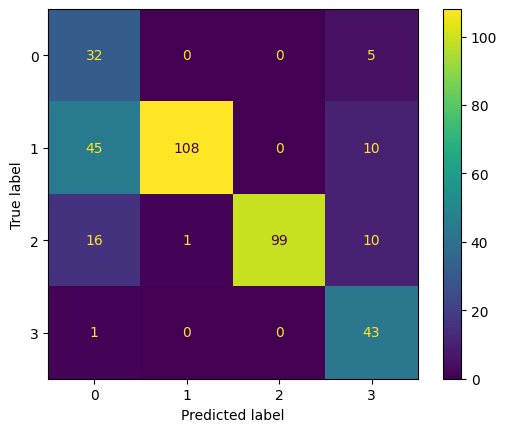

Got 282 / 370 with accuracy 76.22


In [ ]:
confusion_matrx_ViT(pretrained_vit, test_dataloader_pretrained)

# YOLO_v8

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import urllib.request
from PIL import Image
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from torchvision import datasets, transforms

## Training

In [ ]:
model = YOLO("yolov8n-cls.pt").to(device)

100%|██████████| 5.30M/5.30M [00:00<00:00, 45.8MB/s]


In [ ]:
model.train(data = "/content/drive/MyDrive/Madhu Research/Data", epochs = 50)

engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Madhu Research/Data, epochs=50, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, o

100%|██████████| 6.23M/6.23M [00:00<00:00, 57.7MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Madhu Research/Data/train... 2870 images, 0 corrupt: 100%|██████████| 2870/2870 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Madhu Research/Data/val... 24 images, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.405G      1.441         16        224:   1%|          | 1/180 [00:05<16:21,  5.48s/it]


100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 62.08it/s]

                   all      0.667          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.05it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 66.49it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.79it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 55.02it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.07it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.45it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.14it/s]


                   all      0.792          1

      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.398G     0.1528          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.75it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.398G     0.1337          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.87it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.398G     0.1228          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.51it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.398G     0.1418          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.398G     0.1185          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.29it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.398G     0.1302          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.398G     0.1083          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.58it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.398G    0.09677          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.41it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.398G    0.09677          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.07it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.398G     0.0864          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.05it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.398G    0.08987          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.00it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.398G    0.09088          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.398G    0.07872          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 68.31it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.398G    0.07796          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.37it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.398G     0.0762          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.67it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.398G    0.07898          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.69it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.398G    0.06928          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.02it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.398G    0.08505          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.88it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.398G    0.05871          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.56it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.398G    0.06433          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.62it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.398G    0.06093          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.35it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.398G    0.05158          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.99it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.398G    0.05882          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.74it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.398G    0.05497          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.86it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.398G     0.0522          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 61.70it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.398G    0.06151          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.85it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.398G    0.05164          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 25.90it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.398G    0.05234          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.60it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.398G    0.04644          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.03it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.398G    0.04653          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.58it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.398G    0.04657          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.15it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.398G     0.0469          6        224: 100%|██████████| 180/180 [00:38<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.21it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.398G    0.04119          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.52it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.398G    0.04593          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.81it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.398G     0.0487          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 65.50it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.398G    0.04224          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.398G     0.0455          6        224: 100%|██████████| 180/180 [00:36<00:00,  4.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.01it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.398G    0.04194          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.53it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.398G    0.03762          6        224: 100%|██████████| 180/180 [00:37<00:00,  4.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.58it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.398G    0.04583          6        224: 100%|██████████| 180/180 [00:38<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.45it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.398G    0.03953         16        224:  74%|███████▍  | 133/180 [00:28<00:08,  5.26it/s]

In [ ]:
metrics = pd.read_csv("/content/runs/classify/train/results.csv")

train_loss = data["             train/loss"]
val_loss = data["               val/loss"]
train_acc = data["  metrics/accuracy_top1"]

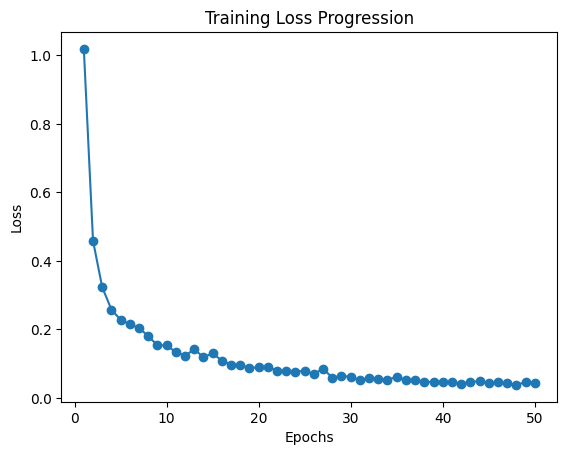

In [ ]:
plt.plot(range(1, 51), train_loss, marker = 'o', linestyle = '-')
plt.title("Training Loss Progression")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

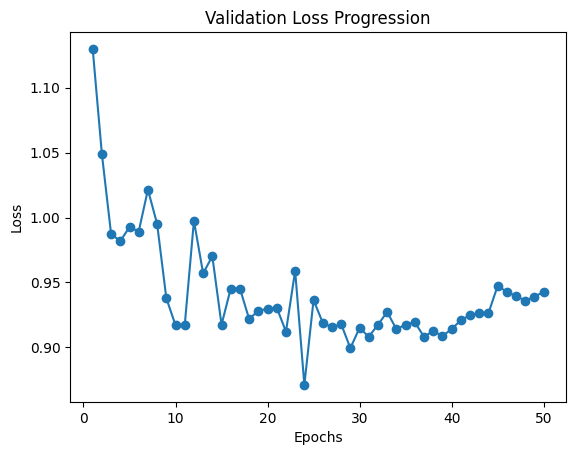

In [ ]:
plt.plot(range(1, 51), val_loss, marker = 'o', linestyle = '-')
plt.title("Validation Loss Progression")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

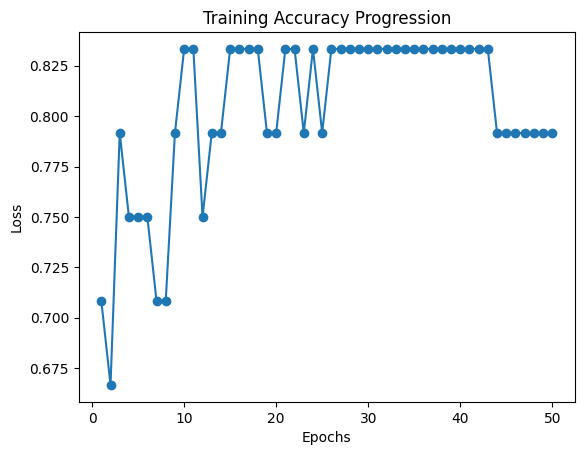

In [ ]:
plt.plot(range(1, 51), train_acc, marker = 'o', linestyle = '-')
plt.title("Training Accuracy Progression")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Testing

In [ ]:
model = YOLO("/content/drive/MyDrive/Madhu Research/YOLOv8_Best_Weights.pt").to(device)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

In [ ]:
test_dataset = datasets.ImageFolder(root = '/content/drive/My Drive/Madhu Research/Data/test', transform = transform)
test_loader = DataLoader(dataset = test_dataset, batch_size = 32, shuffle = True)

In [ ]:
def check_accuracy(loader, model, cm = False):
    num_correct = 0
    num_samples = 0
    #model.eval()

    #with torch.no_grad():
    all_y = []
    all_preds = []
    for x, y in tqdm(loader):
        x = x.to(device = device)
        y = y.to(device = device)
        pred = model.predict(x, verbose = False)
        predictions = []
        for i in pred:
          predictions.append(i.probs.top5[0])
        #_, predictions = pred.max(1)
        all_y.extend(list(y.to('cpu')))
        all_preds.extend(list(predictions))
        for i in range(len(predictions)):
          if predictions[i] == int(y[i]):
            num_correct += 1
        num_samples += len(predictions)

    if cm:
        cm = confusion_matrix(np.array(all_preds), np.array(all_y))
        disp = ConfusionMatrixDisplay(confusion_matrix = cm)
        disp.plot()
        plt.show()

    #model.train()
    print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    return (float(num_correct)/float(num_samples))*100

Testing Accuracy: 


100%|██████████| 12/12 [01:09<00:00,  5.78s/it]


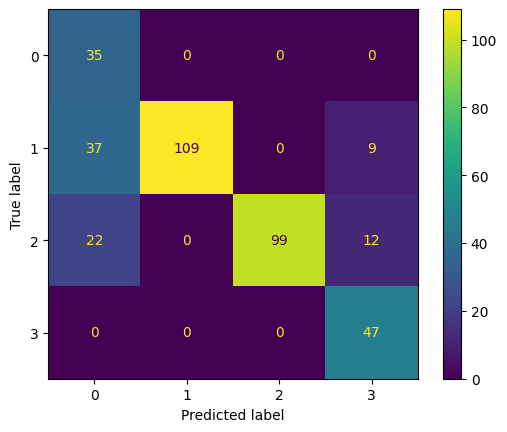

Got 290 / 370 with accuracy 78.38


78.37837837837837

In [ ]:
print("Testing Accuracy: ")
check_accuracy(test_loader, model, True)

In [ ]:
tot = 0
cor = 0
for i in tqdm(os.listdir("/content/drive/MyDrive/Madhu Research/Data/test/glioma_tumor/")):
  x = model(os.path.join("/content/drive/MyDrive/Madhu Research/Data/test/glioma_tumor", i), verbose = False)
  if x[0].probs.top5[0] == 0:
    cor+=1
  tot+=1
print(f"\nAccuracy on Glioma Tumor: {round(cor/tot*100, 2)}%")

100%|██████████| 94/94 [00:01<00:00, 77.00it/s]


Accuracy on Glioma Tumor: 47.87%


In [ ]:
tot = 0
cor = 0
for i in tqdm(os.listdir("/content/drive/MyDrive/Madhu Research/Data/test/meningioma_tumor/")):
  x = model(os.path.join("/content/drive/MyDrive/Madhu Research/Data/test/meningioma_tumor", i), verbose = False)
  if x[0].probs.top5[0] == 1:
    cor+=1
  tot+=1
print(f"\nAccuracy on Meningioma Tumor: {round(cor/tot*100, 2)}%")

100%|██████████| 109/109 [00:01<00:00, 81.85it/s]


Accuracy on Meningioma Tumor: 100.0%


In [ ]:
tot = 0
cor = 0
for i in tqdm(os.listdir("/content/drive/MyDrive/Madhu Research/Data/test/no_tumor/")):
  x = model(os.path.join("/content/drive/MyDrive/Madhu Research/Data/test/no_tumor", i), verbose = False)
  if x[0].probs.top5[0] == 2:
    cor+=1
  tot+=1
print(f"\nAccuracy on No Tumor: {round(cor/tot*100, 2)}%")

100%|██████████| 99/99 [00:01<00:00, 93.96it/s]


Accuracy on No Tumor: 100.0%


In [ ]:
tot = 0
cor = 0
for i in tqdm(os.listdir("/content/drive/MyDrive/Madhu Research/Data/test/pituitary_tumor/")):
  x = model(os.path.join("/content/drive/MyDrive/Madhu Research/Data/test/pituitary_tumor", i), verbose = False)
  if x[0].probs.top5[0] == 3:
    cor+=1
  tot+=1
print(f"\nAccuracy on Pituitary Tumor: {round(cor/tot*100, 2)}%")

100%|██████████| 68/68 [00:01<00:00, 63.45it/s]


Accuracy on Pituitary Tumor: 86.76%


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"